In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard/creditcard.csv


In [2]:
from functools import partial 

import matplotlib.pyplot as plt 
import seaborn as sns


## Loading data 

In [3]:
# reading in the full dataset
df_full = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')

In [4]:
# quick inspection of the dataframe
# casting datatypes to save memory
display(df_full.head())
display(df_full.describe().T)

df_full.info()


# observations
# Time is an integer
# class is 1,0 with the majority being 0 <- so no fraud
# there are no NA values in the dataset
# mean of all V cols is (almost) zero
# std of all  V cols is decreasing with the number of V_<number>
    # indication that V1 is the first component of the pca and V28 is the last, and therfore explains the least amount of variance

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# casting datatypes to reduce the memory footprint
df_in = df_full.assign(
    Time=df_full["Time"].astype("int"), 
    Class=df_full["Class"].astype("category"),
    # added a log1 transform of the amount, to turn it more normal
    Amount_log1p = np.log1p(df_full["Amount"])
)
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Time          284807 non-null  int64   
 1   V1            284807 non-null  float64 
 2   V2            284807 non-null  float64 
 3   V3            284807 non-null  float64 
 4   V4            284807 non-null  float64 
 5   V5            284807 non-null  float64 
 6   V6            284807 non-null  float64 
 7   V7            284807 non-null  float64 
 8   V8            284807 non-null  float64 
 9   V9            284807 non-null  float64 
 10  V10           284807 non-null  float64 
 11  V11           284807 non-null  float64 
 12  V12           284807 non-null  float64 
 13  V13           284807 non-null  float64 
 14  V14           284807 non-null  float64 
 15  V15           284807 non-null  float64 
 16  V16           284807 non-null  float64 
 17  V17           284807 non-null

## EDA

let's start with looking at the Class variable, usally fraud is heavy skewed. 
namely the fraud class is underrepresented

Class
0        0.998273
1        0.001727
Name: proportion, dtype: float64

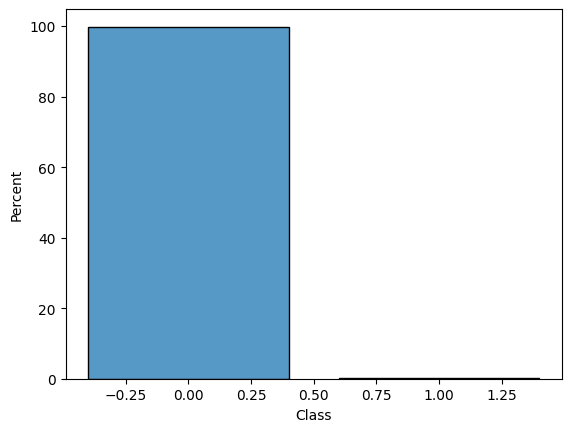

In [6]:
sns.histplot(df_in, x='Class', stat="percent", discrete=True,shrink=.8);
df_in[['Class']].value_counts(normalize=True)

# as excpected the amount of fraud cases is very low compared to the on fraud cases
# the base rate of non-fraud cases is 0.998273

In [7]:
# looking at the top 20 occuring values, we can see that 0.0 is also in there
# a weird transaction, maybe it is some form of auth 
df_in[['Amount']].value_counts(normalize=True,sort=True).head(20)


# lets see if the 0 amount transactions are a fraud case
# a lot of single digit transactions and round numbers 15/25/50 

Amount
1.00      0.048061
1.98      0.021221
0.89      0.017106
9.99      0.016667
15.00     0.011517
0.76      0.010526
10.00     0.010358
1.29      0.010154
1.79      0.009210
0.99      0.008090
20.00     0.007029
0.00      0.006408
8.99      0.006359
11.50     0.006113
4.49      0.005544
5.00      0.005509
0.77      0.005067
2.69      0.005042
25.00     0.004873
50.00     0.004708
Name: proportion, dtype: float64

In [8]:
# pulling out all transactions with a amount of 0 and inspect the class distribution
df_in.loc[df_in['Amount']==0.0, ['Amount','Class']].value_counts(normalize=True,sort=True)

# so not all transaction with 0.0 amount are genuine 
# actually the amount of fraud is an order of magnitude higher than the overall base rate 

Amount  Class
0.0     0        0.985205
        1        0.014795
Name: proportion, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


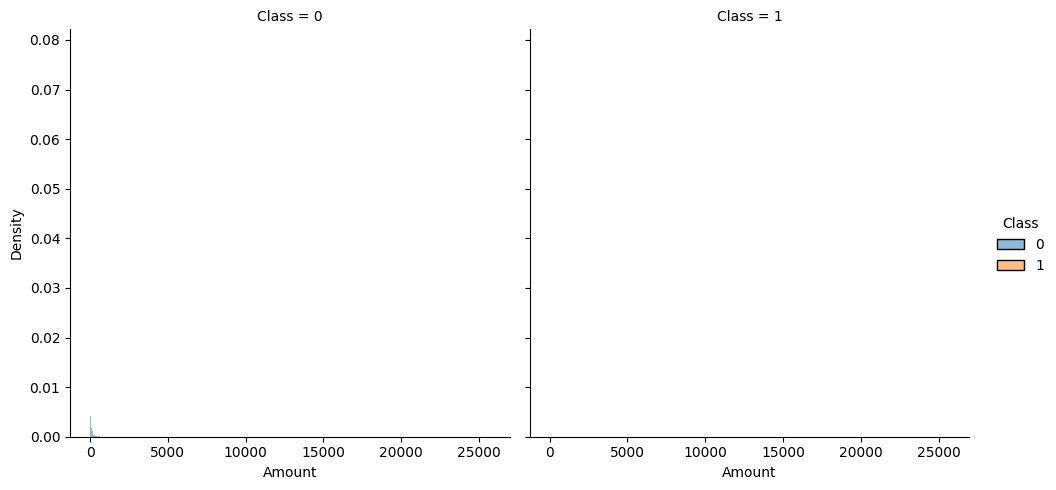

In [9]:
# interesting lets look at a distribution of the amount 
sns.displot(df_in, x='Amount',stat="density",hue='Class', col='Class');

# plot not showing anything usefull apart from a very skewed distribution
# apply a log transform to the amount and try again
# using log1p to handle the amount 0.0 case, https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


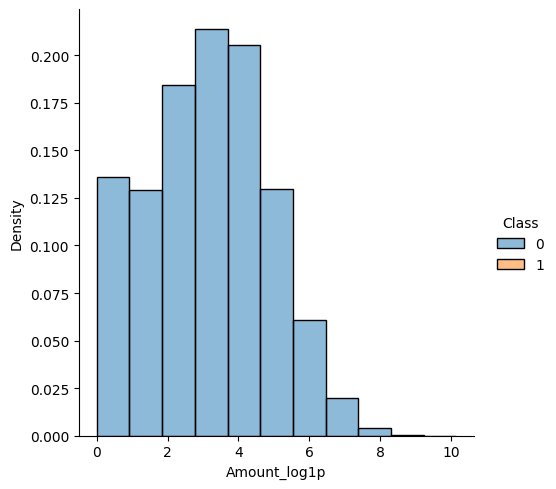

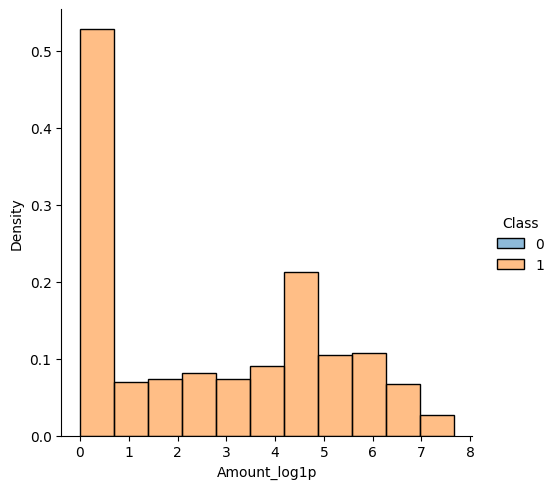

In [10]:
# creating one function to plot both class in seperate plot
def displot_amount(Class:int):
    sns.displot(df_in[df_in['Class']==Class], x='Amount_log1p',stat="density",kind='hist',bins=11, hue='Class');

    
    
# sns.displot(df_in[df_in['Class']==1], x='Amount_log1p',kind='kde',rug=True, hue='Class');
# sns.displot(df_in[df_in['Class']==0], x='Amount_log1p',kind='kde', rug=True ,hue='Class');
displot_amount(0)
displot_amount(1)

# all observed fraud cases are below Amount_log1p of 8 
# most fraud transaction are in the lowest bucket
# this can be a good feature if a binner is applied 

# there is a spike in fraud cases for log1p ~ 4.5
# log1p(100) ~ 4.6 so an amount of 100 is more likely to be a fraud case
# bad actors extracting a sizeable but not large amount to draw to much attention 
# 
# gut feeling is that the fraud cases are round numbers like 10.000 or 5000 
# and the genuine cases are ending in -.99/-.98/-.95 as most items are priced that way 

## random forest model (frm)

let's create a simple rf model and look at the errors
the problem is a two-class classification problem that has a sizeable class imbalance

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [12]:
X = df_full.drop(columns='Class')
y = df_full['Class']

# preforming a stratification of the train/test split
# this ensure that the ratio between non-fraud/fraud cases is the same between the train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [13]:
# create a basics model and train with the train set 
rfm = RandomForestClassifier(n_jobs=-1)
rfm.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [14]:
# creating a dummy model that flags all transactions as non-fraud 
dummy_acc = accuracy_score(y_true=y_test, y_pred=np.zeros(y_test.shape))
print(f'dummy model accuracy score = {dummy_acc}')

# obtaining the score of hte rfm model 
rfm_acc = accuracy_score(y_true=y_test, y_pred=rfm.predict(X_test))
print(f'random forest model accuracy score = {rfm_acc}')

# the dummy model achieves a accuracy of 0.9983
# the rfm   model achieves a sccuracy of 0.9996

rfm_acc/dummy_acc

# that means the rfm model has an improvement factor of 1.00132 when only accuracy is taken into account
# the sole reason the dummy model is performing well is because of the heavy class imbalance  

dummy model accuracy score = 0.9982795547909132
random forest model accuracy score = 0.9995786664794073


1.0013013505908834

In [15]:
# creating a function that calculates multiple scores and returns a dict
# this can be used to input into a pandas dataframe
def calc_scores(y_true, y_pred, sample_weight=None):
    return {
        "accuracy_score": accuracy_score(
            y_true=y_true, y_pred=y_pred, sample_weight=sample_weight
        ),
        "precision_score": precision_score(
            y_true=y_test, y_pred=y_pred, sample_weight=sample_weight, zero_division=0
        ),
        "recall_score": recall_score(
            y_true=y_test, y_pred=y_pred, sample_weight=sample_weight
        ),
        "f1_score": f1_score(y_true=y_test, y_pred=y_pred, sample_weight=sample_weight),
    }


In [16]:
# dummy classifier, i.e. nothing is fraud
dummy_scores = calc_scores(y_test, np.zeros(y_test.shape))
# high accuracy but otherwise all is zero


# scoers of our rfm model
y_pred = rfm.predict(X_test)
rfm_scores = calc_scores(y_test, y_pred)
# the rfm model is scoring beter on the precision, recall scores
# this then also translates to the f1 score, which is the harmonic mean of the other two scores

df_scores = pd.concat(
    [
        pd.DataFrame(dummy_scores, index=[0]).assign(model="dummy"),
        pd.DataFrame(rfm_scores, index=[0]).assign(model="random_forest"),
    ]
)
df_scores


,accuracy_score,precision_score,recall_score,f1_score,model
0,0.998280,0.000000,0.000000,0.000000,dummy
0,0.999579,0.930233,0.816327,0.869565,random_forest


### take away
The random forest model improves the statistical metrics of precision and recall. hooray 
however currently it makes no distiction between the false negatives and false positives.

#### Class imbalance
the dataset contains a heavy class imbalance which currently is not handedled at all.
action: utilize class weighting, with inverse propensity weighting  

#### Amount 
Currently, the model doesn’t take into account the amount of the transaction, from a business perspective
the large fraud amount is something that you really want to block, the lower amount transaction have a lower priority.
action: sample weighting that incorporates the amount, apply the same logic to the scoring function

#### false positives 
these are genuine customers that are unable to buy items, and are therefore frustrated.
if it happens to many times then they will switch to another provider.
That is undesirable, the loss is the profit-margin of the amount, lets say 15% (i know we run a business with high margins ok)

#### false negatives 
these are fraudelent transactions that are not blocked, resulting in 100% write-off of the amount.
as we need to refund the original owner of the funds, and loss of goods.


#### A-symmetry  
that means that there is an asymmetry in the actuall business metric that we are trying to solve for 
therefore the statistical metrics of precision and recall are nice but only tell half the story.
action: creating a custom scorer that takes into __account__ the amount of the __fn__ and __fp__ cases and applies business logic to it 

In [17]:
### apply class imblance

rfm_class_imbal = RandomForestClassifier(class_weight={0:1,1:10},n_jobs=-1)
rfm_class_imbal.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, n_jobs=-1)

In [18]:
rfm_class_imbal_scores = calc_scores(y_test, rfm_class_imbal.predict(X_test))

df_scores = pd.concat(
    [
        pd.DataFrame(rfm_class_imbal_scores, index=[0]).assign(model="random_forest_class_imbal"),
        df_scores
    ]
)
df_scores

,accuracy_score,precision_score,recall_score,f1_score,model
0,0.999579,0.962500,0.785714,0.865169,random_forest_class_imbal
0,0.998280,0.000000,0.000000,0.000000,dummy
0,0.999579,0.930233,0.816327,0.869565,random_forest


takeaways
- the class weighting only imporved the precision, which intuitivly makes sense as the fraud cases are weighted more heavily so, we are teaching the model to only select the transactions if the certainty is high.

- the recall drops, most likely because if the model has low confidence in the classification it doesnt select it, in combination with the internal metric that the model is solving for namely accuracy.

- the accuracy has not changed between the models 

lets experiment with introducing sample weighting, the higher the amount the more interest we have in capturing that transaction

In [19]:
# utilize the amount as a sample weighting 
# applying a log + 1 transform, this will handle the case if the amount is zero 
# and it will direct the model to not only focus on a handfull of big transactions 

sample_weight = np.log1p(X_train['Amount'])

In [20]:
# adding the created sample weight during the fit method 
# this will weight each sample differently based on the amoutn 
rfm_sample_weight = RandomForestClassifier(class_weight={0:1,1:10},n_jobs=-1)
rfm_sample_weight.fit(X_train, y_train, sample_weight=sample_weight)

RandomForestClassifier(class_weight={0: 1, 1: 10}, n_jobs=-1)

In [21]:
# in order to accuratly reflect the performance of the model 
# the smaple weights also need to be include in the scoreing func

sample_weight_test = np.log1p(X_test['Amount'])
rfm_sample_weight_scores = calc_scores(
    y_test, rfm_sample_weight.predict(X_test), sample_weight=sample_weight_test
)

df_scores = pd.concat(
    [
        pd.DataFrame(rfm_sample_weight_scores, index=[0]).assign(
            model="random_forest_sample_weights"
        ),
        df_scores,
    ]
)
df_scores


,accuracy_score,precision_score,recall_score,f1_score,model
0,0.999661,0.993554,0.782588,0.875542,random_forest_sample_weights
0,0.999579,0.962500,0.785714,0.865169,random_forest_class_imbal
0,0.998280,0.000000,0.000000,0.000000,dummy
0,0.999579,0.930233,0.816327,0.869565,random_forest


a clear uplift for all metrics can be seen and we have a model that performs pretty well
when looking at these statistical metrics.
however the other metrics have been calculated without the smaple weighting, therefore the comparison cannot be made like-for-like



In [22]:
# dummy classifier
dummy_scores = calc_scores(
    y_test, np.zeros(y_test.shape), sample_weight=sample_weight_test
)

# random forest vanilla
rfm_scores = calc_scores(y_test, rfm.predict(X_test), sample_weight=sample_weight_test)


# random forest with the class weighting
rfm_class_imbal_scores = calc_scores(
    y_test, rfm_class_imbal.predict(X_test), sample_weight=sample_weight_test
)


# random forest with sample weighting
rfm_sample_weight_scores = calc_scores(
    y_test, rfm_sample_weight.predict(X_test), sample_weight=sample_weight_test
)

df_scores_sample_weights = pd.concat(
    [
        pd.DataFrame(dummy_scores, index=[0]).assign(model="dummy"),
        pd.DataFrame(rfm_scores, index=[0]).assign(model="random_forest"),
        pd.DataFrame(rfm_class_imbal_scores, index=[0]).assign(
            model="random_forest_class_imbal"
        ),
        pd.DataFrame(rfm_sample_weight_scores, index=[0]).assign(
            model="random_forest_sample_weights"
        ),

    ]
)
df_scores_sample_weights


,accuracy_score,precision_score,recall_score,f1_score,model
0,0.998478,0.000000,0.000000,0.000000,dummy
0,0.999722,0.973037,0.840847,0.902125,random_forest
0,0.999662,0.990979,0.785126,0.876123,random_forest_class_imbal
0,0.999661,0.993554,0.782588,0.875542,random_forest_sample_weights
